In [1]:
from nskit import *

# Parse structure into Nucleic Acid object 

**NucleicAcid** is a key object of nskit package, which contains nucleic acid as a graph.</br>
You can parse nucleic base sequence and DotBracket secondary structure using **NA** function.</br>
**NA** will automatically validate sequence and structure. Additional parameters modify parsing process:

In [2]:
help(NA)

Help on function NA in module nskit.parse_na:

NA(a: Union[str, nskit.nucleic_acid.NucleicAcid], b: Union[str, NoneType] = None, /, *, name: Union[str, NoneType] = None, meta: Union[dict, NoneType] = None, filter_linear_structures: bool = False, ignore_unclosed_bonds: bool = False, upper_sequence: bool = True) -> nskit.nucleic_acid.NucleicAcid
    Parse dotbracket strings into NucleicAcid.
    
    :param a: sequence or structure if sequence is not provided.
    :param b: structure if sequence is provided.
    :param name: na name.
    :param meta: dictionary of meta information convertable to string.
    :param filter_linear_structures: raise error on structure with no complementary bonds. Default - False.  
    :param ignore_unclosed_bonds: omit single unpaired parentheses without raising error. Default - False.
    :param upper_sequence: upper sequence characters. Default - True.
    
    :return: NucleicAcid object.



In [3]:
# Only sequence
na = NA('AUUGCGCGUGA', name='seq1')
print(na)

seq1
AUUGCGCGUGA
None


In [4]:
# Only structure
# NA will automaticaly fill sequence with "N"
na = NA('...((..))..((..))..', name='seq2')
print(na)

seq2
NNNNNNNNNNNNNNNNNNN
...((..))..((..))..


In [5]:
# Full dot bracket
na = NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
        '....(((((..[[[.)))))........]]]..', 
        name='bpRNA_PDB_108', 
        meta={'cyclization_energy':2.33456} # dictionary of meta information
       )
print(na)
print(na.meta)

bpRNA_PDB_108
GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA
....(((((..[[[.)))))........]]]..
{'cyclization_energy': 2.33456}


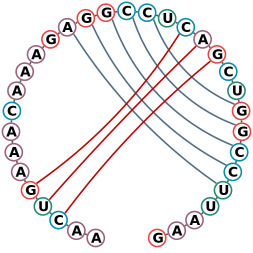

In [6]:
# Jupyter svg representation
na

Get attributes from NA

In [7]:
na.seq

'GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA'

In [8]:
na.struct

'....(((((..[[[.)))))........]]]..'

## Work with NA graph

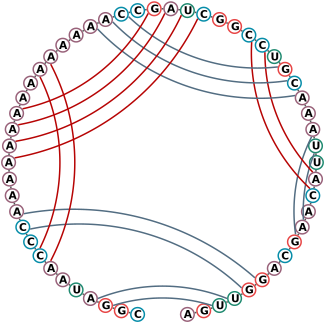

In [9]:
na = NA('AGUUGGACGAACAUUAAACGUCCGGCUAGCCAAAAAAAAAAAAAAACCCAAUAGGC', 
        '..((((..((.[[.)).{{{.]]..((((.}}}..[[..))))..)).]]..))..')
na

**nskit** can parse structure graph into complementary pairs and helixes

In [10]:
print("All secondary structure pairs:")
print(na.pairs, '\n')

print("All secondary structure helixes:")
for h in na.helixes:
    print(h)
print('')

print("Indexes of knot helixes:")
print(na.knots, '\n')

print("Knot helixes orders:")
print(na.helix_orders, '\n')

print("Secondary structure knot pairs:")
print(na.knot_pairs, '\n')

print("Secondary structure knot helixes:")
for h in na.knot_helixes:
    print(h)

All secondary structure pairs:
[(2, 53), (3, 52), (4, 46), (5, 45), (8, 15), (9, 14), (11, 22), (12, 21), (17, 32), (18, 31), (19, 30), (25, 42), (26, 41), (27, 40), (28, 39), (35, 49), (36, 48)] 

All secondary structure helixes:
((2, 3), (52, 53))
((4, 5), (45, 46))
((8, 9), (14, 15))
((11, 12), (21, 22))
((17, 18, 19), (30, 31, 32))
((25, 26, 27, 28), (39, 40, 41, 42))
((35, 36), (48, 49))

Indexes of knot helixes:
(3, 5, 6) 

Knot helixes orders:
(0, 0, 0, 1, 0, 1, 2) 

Secondary structure knot pairs:
[(11, 22), (12, 21), (25, 42), (26, 41), (27, 40), (28, 39), (35, 49), (36, 48)] 

Secondary structure knot helixes:
((11, 12), (21, 22))
((25, 26, 27, 28), (39, 40, 41, 42))
((35, 36), (48, 49))


## Work with adjacency matrix

In [11]:
import matplotlib.pyplot as plt
import numpy as np

Get adjacency from NA

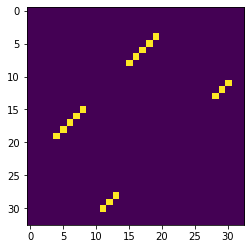

In [12]:
na = NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
        '....(((((..[[[.)))))........]]]..')

adj = na.get_adjacency()
plt.imshow(adj)

Create NA from adjacency

In [14]:
na_adj = NucleicAcid.from_adjacency(adj, seq=na.seq)
print(na_adj)

GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA
....(((((..[[[.)))))........]]]..


# I/O operations

**nskit** supports reading and writing of the following formats:
- **Fasta** with only sequnce divided into multiple lines by 80 nb
- Extended **DotBracket** with sequence, secondary structure and meta information
- **bpseq**
- **PDB**, only reading with parsing of secondary structure based on hydrogen bonds energy 

You can easily Read and Write structures using **with** context manager

## DotBracket

In [ ]:
with DotRead("path", 
              raise_na_errors=False, # By default DotRead will return None on erroneous structures
              filter_linear_structures=False, 
              ignore_unclosed_bonds=False
              ) as f:
    for na in f: # iterate over NucleicAcid objects 
        ...

In [ ]:
na = NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
        '....(((((..[[[.)))))........]]]..')

with DotWrite("path", 
                append=False # you can append new structures to file
               ) as w:
    w.write(na, 
            # By default DotWrite will write structure and meta information
            write_struct = True,
            write_meta = True
           )

DotWrite can write lines from list or tuple without validation

In [ ]:
with DotWrite("path") as w:
    w.write(['Seq1', 'AAUU', '(..)']) # first argument must be name

## Fasta

In [ ]:
with FastaRead("path", 
              raise_na_errors=False, # By default FastaRead will return None on erroneous structures
              ) as f:
    for na in f: # iterate over NucleicAcid objects 
        ...

FastaWrite splits sequence by chunks of 80 characters

In [ ]:
na = NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
        '....(((((..[[[.)))))........]]]..')

with FastaWrite("path", 
                append=False # By default FastaRead will return None on erroneous structures
               ) as w:
    w.write(na)

## bpseq

To read individual file

In [ ]:
with bpseqRead("path") as f:
    na = f.read()

To iterate over files with ".bpseq" format in directory and read them

In [ ]:
with bpseqDirRead("dir_path") as f:
    for na in f:
        ...

In [ ]:
na = NA('GAAUUCCGGUCGACUCCGGAGAAACAAAGUCAA', 
        '....(((((..[[[.)))))........]]]..')

with bpseqWrite("path") as w:
    w.write(na)

## PDB

**nskit** allows to parse pdb file and secondary structure of a nucleic acid using 10-12 hydrogen bond potentials.</br>
**pdbParse** can read complexes of nas with proteins and ligands, ignoring them.

In [14]:
parser = pdbParse()
nas = parser.parse("../Seq1859_tr.pdb")

In [15]:
nas # pdbParse parces all na chains in file by default

[Seq1859_tr
 AUUUAACAUCAAGAGUAGGGCUGACGUCCUCACCAACCUGCCAACCUGGGCAAGGUGGUUGCUAUAAAGCGAUGUGGUCGAUUCCGACAACGAAUCAGGUAGAC
 .....(((((....(.((((((..))))))).((.(((((..[[[[.....)))))))............)))))(((((....)))))........]]]]...,
 Seq1859_tr
 AUUUAACAUCAAGAGUAGGGCUGACGUCCUCACCAACCUGCCAACCUGGGCAAGGUGGUUGCUAUAAAGCGAUGUGGUCGAUUCCGACAACGAAUCAGGUAGAC
 .....(((((....(.((((((..)))))))(((..(((((..[[[[..)).))).)))...........)))))((((((..)))))).......]]]]....]

In [16]:
parser = pdbParse()
nas = parser.parse("../Seq1859_tr.pdb",
                ignore_nonstandard_residues = False, # to ignore modified nucleic bases
                with_energy_matrix = True, # return matrix of hydrogen bond energies
                return_single_chain = True, # parse only first chain in the file
                )

In [17]:
len(nas)

1

In [18]:
na, M = nas[0]
na

Seq1859_tr
AUUUAACAUCAAGAGUAGGGCUGACGUCCUCACCAACCUGCCAACCUGGGCAAGGUGGUUGCUAUAAAGCGAUGUGGUCGAUUCCGACAACGAAUCAGGUAGAC
.....(((((....(.((((((..))))))).((.(((((..[[[[.....)))))))............)))))(((((....)))))........]]]]...

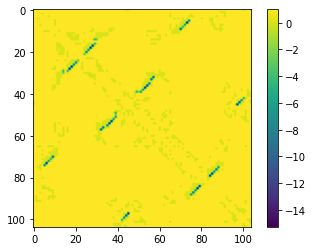

In [19]:
plt.imshow(M)
plt.colorbar()